# Lab №6

In [471]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erf
from scipy.stats import chi2, t, zscore

# Исходные данные

In [472]:
x = np.array(
    [
        20.0, 21.5, 20.0, 20.0, 19.0, 19.0, 22.0, 22.5, 21.0, 24.5, 23.5, 21.0, 23.0, 21.0, 21.5, 23.0, 20.5, 21.0,
        23.5, 22.0, 19.5, 21.5, 22.0, 23.5, 20.5, 21.0, 19.5, 21.5, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 22.0, 20.5,
        20.5, 21.5, 20.5, 21.5, 24.5, 21.5, 19.0, 20.5, 20.0, 19.0, 21.0, 20.5, 21.0, 18.5, 19.5,
        22.5, 21.0, 19.5, 19.5, 21.0, 21.5, 22.0, 21.0, 21.5, 21.0, 22.5, 20.0, 22.5, 21, 21.0, 21.5, 21.5,
        23.0, 21.5, 21.0, 22.5, 20.5, 21.5, 22.0, 21.5, 20.0, 21.0, 20.0, 22.5, 18.0, 25.0, 22.5, 22.5, 18.5,
        20.0, 22.0, 21.0, 22.5, 21.5, 21.0, 23.0, 24.0, 21.5, 22.0, 21.5, 20.5, 21.5, 20.5, 21.5,
    ])

y = np.array(
    [
        50, 44, 26, 46, 29, 27, 63, 75, 55, 85, 85, 54, 100, 57, 70, 84, 60, 63, 87, 61, 40, 59, 48, 82, 45, 47, 30, 50,
        65, 72, 59, 62, 43, 50, 65, 28, 42, 63, 40, 53, 93, 65, 30, 48, 25, 35, 69, 31, 55, 33, 26, 74, 60, 26, 40, 33,
        61, 72, 52, 53, 43, 61, 32, 64, 50, 61, 78, 55, 74, 56, 56, 52, 53, 53, 72, 60, 50, 85, 40, 42, 26, 91, 79, 83,
        37, 52, 85, 51, 75, 58, 70, 90, 87, 54, 55, 58, 27, 60, 41, 46, ])

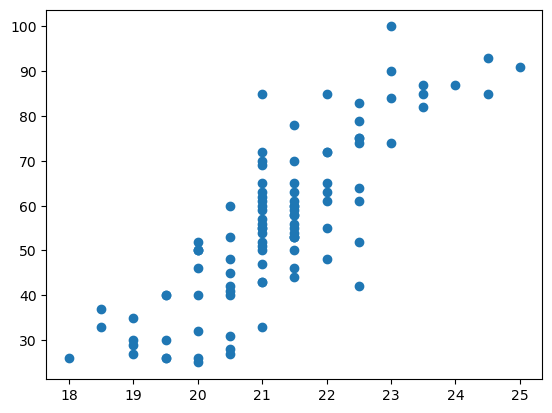

In [473]:
plt.scatter(x, y)

### Фильтрация от выбросов

In [474]:
data = pd.DataFrame({'x': x, 'y': y})
z = np.abs(zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(100, 2)

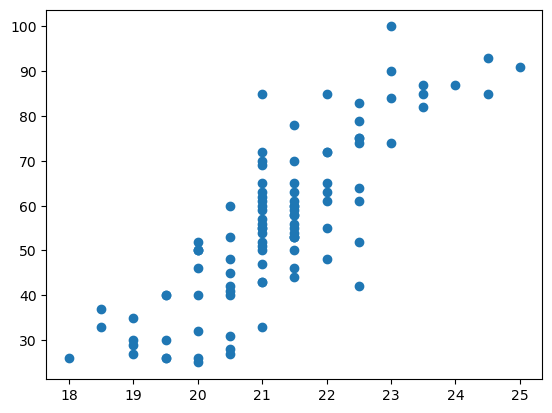

In [475]:
plt.scatter(data_clean['x'], data_clean['y'])

In [476]:
x = np.array(data_clean['x'])
y = np.array(data_clean['y'])

# Группирование данных по интервалам

### Для x

In [477]:
N_x = 5
N_y = 5
n = x.__len__()

In [478]:
h_x = (np.max(x) - np.min(x)) / (N_x - 1)
h_x

1.75

In [479]:
x_intervals = [np.min(x) - h_x / 2, ]
for i in range(1, N_x + 1):
    x_intervals.append(x_intervals[i - 1] + h_x)

x_intervals

[17.125, 18.875, 20.625, 22.375, 24.125, 25.875]

In [480]:
x_avgs = [x_intervals[0] + h_x / 2, ]
for i in range(2, N_x + 1):
    x_avgs.append((x_intervals[i - 1] + x_intervals[i]) / 2)

x_avgs

[18.0, 19.75, 21.5, 23.25, 25.0]

In [481]:
m_x = []
for i in range(N_x):
    m_i = 0
    for x_i in x:
        if i == N_x - 1:
            if x_intervals[i] <= x_i <= x_intervals[i + 1]:
                m_i += 1
        else:
            if x_intervals[i] <= x_i < x_intervals[i + 1]:
                m_i += 1
    m_x.append(m_i)

m_x = np.array(m_x)
m_x

array([ 3, 28, 49, 17,  3])

In [482]:
p_x = m_x / n
p_x

array([0.03, 0.28, 0.49, 0.17, 0.03])

In [483]:
f_x = p_x / h_x
f_x

array([0.01714286, 0.16      , 0.28      , 0.09714286, 0.01714286])

Проверка условий

In [484]:
np.sum(m_x) == n

True

In [485]:
np.sum(p_x) == 1

True

In [591]:
(0.55 * 10 ** 0.4, 1.25 * 10 ** 0.4)

(1.3815375373302692, 3.1398580393869753)

### Для y

In [487]:
h_y = (np.max(y) - np.min(y)) / (N_y - 1)
h_y

18.75

In [488]:
y_intervals = [np.min(y) - h_y / 2, ]
for i in range(1, N_y + 1):
    y_intervals.append(y_intervals[i - 1] + h_y)

y_intervals

[15.625, 34.375, 53.125, 71.875, 90.625, 109.375]

In [489]:
y_avgs = [y_intervals[0] + h_y / 2, ]
for i in range(2, N_y + 1):
    y_avgs.append((y_intervals[i - 1] + y_intervals[i]) / 2)

y_avgs

[25.0, 43.75, 62.5, 81.25, 100.0]

In [490]:
m_y = []
for i in range(N_y):
    m_i = 0
    for y_i in y:
        if i == N_y - 1:
            if y_intervals[i] <= y_i <= y_intervals[i + 1]:
                m_i += 1
        else:
            if y_intervals[i] <= y_i < y_intervals[i + 1]:
                m_i += 1
    m_y.append(m_i)

m_y = np.array(m_y)
m_y

array([15, 31, 32, 19,  3])

In [491]:
p_y = m_y / n
p_y

array([0.15, 0.31, 0.32, 0.19, 0.03])

In [492]:
f_y = p_y / h_y
f_y

array([0.008     , 0.01653333, 0.01706667, 0.01013333, 0.0016    ])

Проверка условий

In [493]:
np.sum(m_y) == n

True

In [494]:
np.sum(p_y) == 1

True

# Статистический ряд и графики

In [495]:
df_x = pd.DataFrame(
    data={'x_avg_i': x_avgs, 'm_x': m_x, 'p_x': p_x, 'f_x': f_x, })
df_x.T

,0,1,2,3,4
x_avg_i,18.000000,19.75,21.50,23.250000,25.000000
m_x,3.000000,28.00,49.00,17.000000,3.000000
p_x,0.030000,0.28,0.49,0.170000,0.030000
f_x,0.017143,0.16,0.28,0.097143,0.017143


In [496]:
df_y = pd.DataFrame(
    data={'y_avg_i': y_avgs, 'm_y': m_y,
          'p_y': p_y, 'f_y': f_y})
df_y.T

,0,1,2,3,4
y_avg_i,25.000,43.750000,62.500000,81.250000,100.0000
m_y,15.000,31.000000,32.000000,19.000000,3.0000
p_y,0.150,0.310000,0.320000,0.190000,0.0300
f_y,0.008,0.016533,0.017067,0.010133,0.0016


## Графики

### Для x

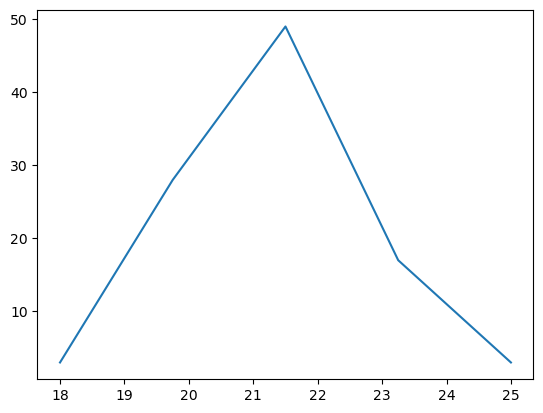

In [497]:
plt.plot(df_x['x_avg_i'], df_x['m_x'])

<BarContainer object of 5 artists>

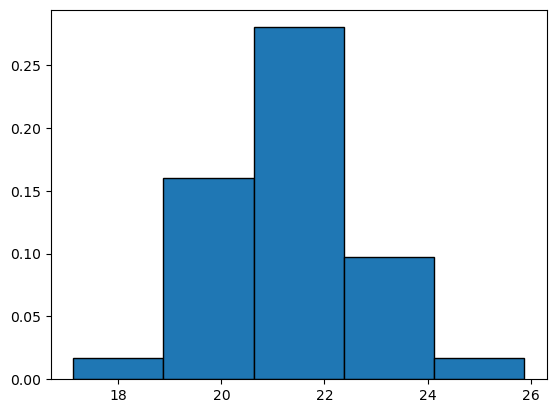

In [498]:
plt.bar(df_x['x_avg_i'], height=df_x['f_x'], width=np.array(x_intervals[:-1]) - np.array(x_intervals[1:]),
        edgecolor='black')

# TODO: отложить три сигмы от среднего выборочного влево и вправо

### Для y

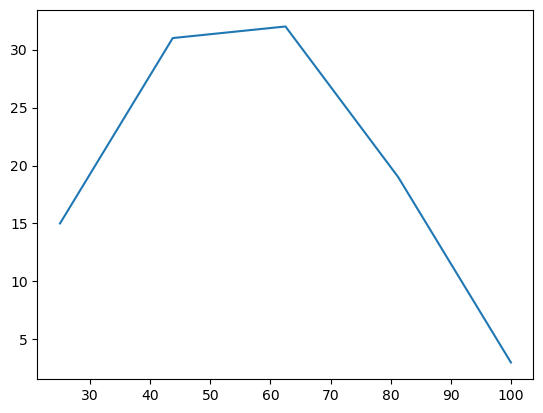

In [499]:
plt.plot(df_y['y_avg_i'], df_y['m_y'])

<BarContainer object of 5 artists>

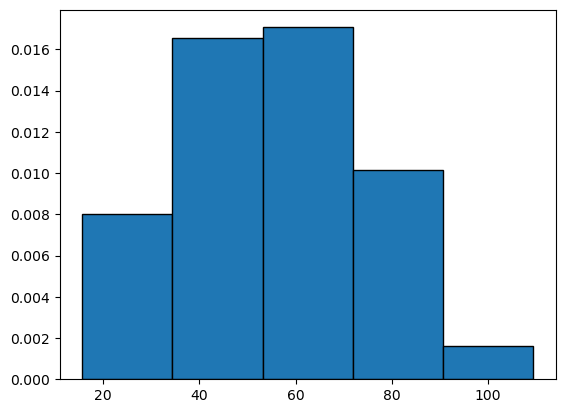

In [500]:
plt.bar(df_y['y_avg_i'], height=df_y['f_y'], width=np.array(y_intervals[:-1]) - np.array(y_intervals[1:]),
        edgecolor='black')

# Числовые характеристики

### Для x

In [501]:
m_k_x = np.array([np.sum(np.power(x_avgs, k) * m_x) for k in range(1, 5)]) / n
m_k_x

array([2.13075000e+01, 4.56085625e+02, 9.80713266e+03, 2.11845791e+05])

In [502]:
x_sample = m_k_x[0]
x_sample

21.3075

In [503]:
s_2_x = m_k_x[1] - x_sample ** 2
s_2_x

2.0760687499999335

In [504]:
s_2_x ** .5

1.4408569498739052

In [505]:
s_2_x_corrected = (s_2_x * n) / (n - 1)
s_2_x_corrected

2.0970391414140743

In [506]:
a_sample_x = (m_k_x[2] - 3 * m_k_x[0] * m_k_x[1] + 2 * m_k_x[0] ** 3) / s_2_x_corrected ** (3 / 4)
a_sample_x

0.3537940837243795

In [507]:
excess_x = (m_k_x[3] - 4 * m_k_x[0] * m_k_x[2] + 6 * m_k_x[0] ** 2 * m_k_x[1] -
            3 * m_k_x[0] ** 4) / s_2_x_corrected ** 2 - 3
excess_x

0.009847863655908284

Для больших n

In [508]:
m_k_x_big = np.array([np.sum(np.power(x, k)) for k in range(1, 5)]) / n
m_k_x_big

array([2.12300000e+01, 4.52435000e+02, 9.67890500e+03, 2.07859441e+05])

In [509]:
x_avg_big = np.sum(x) / n
x_avg_big

21.23

In [510]:
x_avg_big - m_k_x[0]

-0.07750000000000057

In [511]:
s_2_x_big = np.sum((x - x_avg_big) ** 2) / n
s_2_x_big

1.7221000000000006

In [512]:
s_2_x_corrected_big = n * s_2_x_big / (n - 1)
s_2_x_corrected_big

1.73949494949495

In [513]:
a_x_big = (m_k_x_big[2] - 3 * m_k_x_big[0] * m_k_x_big[1] + 2 * m_k_x_big[0] ** 3) / s_2_x_corrected_big ** (3 / 4)
a_x_big

0.3892497211476687

Все числовые характеристики, вычесленные как по формулам для больших, так и для маленьких n, -- одинаковые.

### Для y

In [514]:
m_k_y = np.array([np.sum(np.power(y_avgs, k) * m_y) for k in range(1, 5)]) / n
m_k_y

array([5.57500000e+01, 3.49140625e+03, 2.38339844e+05, 1.73574524e+07])

In [515]:
y_sample = m_k_y[0]
y_sample

55.75

In [516]:
len(y_avgs)

5

In [517]:
m_k_y

array([5.57500000e+01, 3.49140625e+03, 2.38339844e+05, 1.73574524e+07])

In [518]:
s_2_y = m_k_y[1] - y_sample ** 2
s_2_y

383.34375

In [519]:
s_2_y_corrected = (s_2_y * n) / (n - 1)
s_2_y_corrected

387.21590909090907

In [520]:
a_sample_y = (m_k_y[2] - 3 * m_k_y[0] * m_k_y[1] + 2 * m_k_y[0] ** 3) / (s_2_y_corrected ** (3 / 4))
a_sample_y

# TODO добавить вычисления для "больших" размеров выборок, сравнить результаты

10.896051206240001

In [521]:
excess_y = (m_k_y[3] - 4 * m_k_y[0] * m_k_y[2] + 6 * m_k_y[0] ** 2 * m_k_y[1] - 3 * m_k_y[
    0] ** 4) / s_2_y_corrected ** 2 - 3
excess_y

-0.7552929767909786

# Выборочный коэффициент корреляции

In [522]:
n_corr = []
for i in range(N_x):
    n_i = []
    for j in range(N_y):
        n_i_j = 0

        for k in range(n):
            if x_intervals[i] <= x[k] < x_intervals[i + 1] and y_intervals[j] <= y[k] < y_intervals[j + 1]:
                n_i_j += 1
        n_i.append(n_i_j)
    n_corr.append(n_i)
np.sum(n_corr)

100

In [523]:
n_corr

[[2, 1, 0, 0, 0],
 [12, 15, 1, 0, 0],
 [1, 13, 29, 6, 0],
 [0, 2, 2, 12, 1],
 [0, 0, 0, 1, 2]]

In [524]:
r_sample = (np.sum(
    [x_avgs[i] * y_avgs[j] * n_corr[i][j] for i in range(N_x) for j in range(N_y)]) - n * x_sample * y_sample) / (
                   n * np.sqrt(s_2_x_corrected * s_2_y_corrected))
r_sample

0.7719576259765311

In [525]:
r = (np.sum(x * y) / n - np.sum(x) / n * np.sum(y) / n) / (np.sqrt(s_2_x_corrected * s_2_y_corrected))
r

0.6840988641901967

# Lab №7

## Доверительный интервал, дисперсия неизвестна

In [526]:
gamma_1 = 0.99
gamma_2 = 0.95

In [527]:
sigma_x = s_2_x_corrected ** 0.5
sigma_y = s_2_y_corrected ** 0.5
(sigma_x, sigma_y)

(1.4481157210023219, 19.67780244567236)

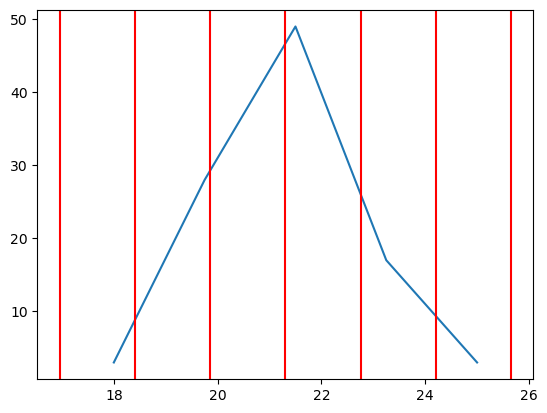

In [528]:
plt.plot(df_x['x_avg_i'], df_x['m_x'])
[plt.axvline(x_sample + sigma_x * i, color='red') for i in range(-3, 4)]

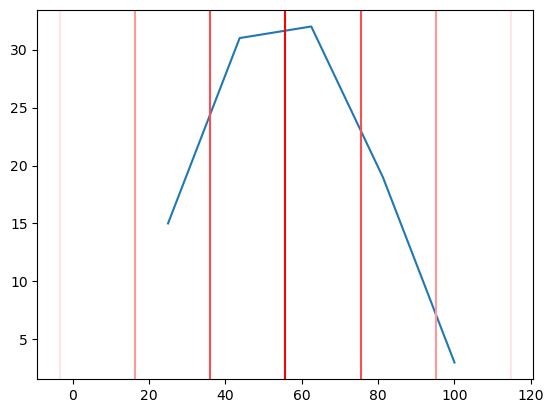

In [529]:
plt.plot(df_y['y_avg_i'], df_y['m_y'])
[plt.axvline(y_sample + sigma_y * i, color=(1, 0.3 * abs(i), 0.3 * abs(i))) for i in range(-3, 4)]

### Для x

In [530]:
t_1 = t.ppf(gamma_1, n - 1)
t_2 = t.ppf(gamma_2, n - 1)
(t_1, t_2)

(2.3646058614359737, 1.6603911559963895)

In [531]:
length = t_1 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_1 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_1

(20.965077707808035, 21.649922292191967)

In [532]:
length = t_2 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_2 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_2

(21.06705614639884, 21.54794385360116)

### Для y

In [533]:
length = t_1 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_1 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_1

(51.0969752996784, 60.4030247003216)

In [534]:
length = t_2 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_2 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_2

(52.48271508497615, 59.01728491502385)

## Доверительный интервал, дисперсия известна

In [535]:
big_f = lambda x: erf(x / 2 ** 0.5) / 2

In [536]:
z_1 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_1 / 2) <= 0.001:
        z_1 = float(i / 100)
        break
z_1

2.55

In [537]:
z_2 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_2 / 2) <= 0.001:
        z_2 = float(i / 100)
        break
z_2

1.96

### Для x

In [538]:
length = z_1 * sigma_x / n ** 0.5
confidence_interval_x_1 = (x_sample - length, x_sample + length)
confidence_interval_x_1

(20.93823049114441, 21.676769508855593)

In [539]:
length = z_2 * sigma_x / n ** 0.5
confidence_interval_x_2 = (x_sample - length, x_sample + length)
confidence_interval_x_2

(21.023669318683545, 21.591330681316457)

Вот такой занимательный результат

### Для y

In [540]:
length = z_1 * sigma_y / n ** 0.5
confidence_interval_y_1 = (y_sample - length, y_sample + length)
confidence_interval_y_1

(50.73216037635355, 60.76783962364645)

In [541]:
length = z_2 * sigma_y / n ** 0.5
confidence_interval_y_2 = (y_sample - length, y_sample + length)
confidence_interval_y_2

(51.893150720648215, 59.606849279351785)

Тоже занимательные результаты

## Доверительные интервалы для дисперсии

In [542]:
chi2_1_1 = chi2.ppf(1 - (1 - gamma_1) / 2, n - 1)
chi2_1_2 = chi2.ppf((1 - gamma_1) / 2, n - 1)

chi2_2_1 = chi2.ppf(1 - (1 - gamma_2) / 2, n - 1)
chi2_2_2 = chi2.ppf((1 - gamma_2) / 2, n - 1)

### Для x

In [543]:
sas = (n - 1) * s_2_x_corrected
confidence_interval_sigma_x_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_x_1

(3.1214335634884383, 1.4937166674792197)

In [544]:
confidence_interval_sigma_x_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_x_2

(2.8299320901310825, 1.61659912910834)

### Для y

In [545]:
sas = (n - 1) * s_2_y_corrected
confidence_interval_sigma_y_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_y_1

(576.369182187998, 275.81309566410334)

In [546]:
confidence_interval_sigma_y_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_y_2

(522.543764350878, 298.50320342192185)

## Проверка гипотез о законах распределения случайных величин

### Проверка гипотезы о том, что x распределена по нормальному закону

In [547]:
u_x = (x_intervals - x_sample) / s_2_x_corrected ** 0.5
u_x

array([-2.88823603, -1.67976907, -0.47130211,  0.73716484,  1.9456318 ,
        3.15409876])

In [548]:
f_x = big_f(u_x)
f_x

array([-0.49806295, -0.45349887, -0.1812875 ,  0.26948895,  0.47415051,
        0.49919503])

In [549]:
df_x['p_x']

0    0.03
1    0.28
2    0.49
3    0.17
4    0.03
Name: p_x, dtype: float64

In [550]:
r_x = np.array([big_f(u_x[i + 1]) - big_f(u_x[i]) for i in range(N_x)])
r_x

array([0.04456408, 0.27221138, 0.45077644, 0.20466156, 0.02504452])

In [551]:
chi2_x_observed = np.sum((df_x['p_x'] - r_x) ** 2 / r_x) * n
chi2_x_observed

1.5246363722459841

In [552]:
chi2.ppf(0.9, N_x - 1 - 2)

4.605170185988092

In [553]:
chi2_x_observed < chi2.ppf(0.9, N_x - 1 - 2)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина X распределена по нормальному закону, верна.

### Проверка гипотез о законе распеределения y

##### Проверка гипотезы о том, что величина Y распределена по нормальному закону

In [554]:
u_y = (y_intervals - y_sample) / s_2_y_corrected ** 0.5
u_y

array([-2.03909965, -1.08624934, -0.13339904,  0.81945126,  1.77230156,
        2.72515186])

In [555]:
f_y = big_f(u_y)
f_y

array([-0.47927996, -0.36131565, -0.0530611 ,  0.2937355 ,  0.46182774,
        0.4967864 ])

In [556]:
r_y_gauss = np.array([big_f(u_y[i + 1]) - big_f(u_y[i]) for i in range(N_y)])
r_y_gauss

array([0.1179643 , 0.30825456, 0.3467966 , 0.16809224, 0.03495866])

In [557]:
chi2_y_observed_gauss = np.sum((df_y['p_y'] - r_y_gauss) ** 2 / r_y_gauss) * n
chi2_y_observed_gauss

1.433902697196768

In [589]:
chi2.ppf(0.9, N_y - 1 - 2)

4.605170185988092

In [590]:
chi2_y_observed_gauss < chi2.ppf(0.9, N_y - 1 - 2)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по нормальному закону, не верна.

##### Проверка гипотезы о том, что величина Y распределена по закону Пуассона

In [560]:
exponential = lambda x, l: l * np.e ** (-l * x)
exponential(1, 2)

0.2706705664732254

In [562]:
l = 1 / y_sample
l

0.017937219730941704

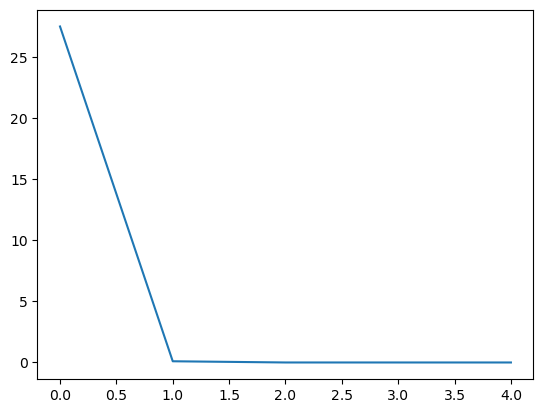

In [563]:
r_y_poisson = np.array(
    [exponential(y_intervals[i], 0.3) - exponential(y_intervals[i + 1], .3) for i in range(N_y)])
plt.plot(r_y_poisson * 1e4)

In [565]:
df_y['p_y']

0    0.15
1    0.31
2    0.32
3    0.19
4    0.03
Name: p_y, dtype: float64

In [566]:
chi2_y_observed_poisson = np.sum((df_y['p_y'] - r_y_poisson * 1e4) ** 2 / (r_y_poisson * 1e4)) * n
chi2_y_observed_poisson

22149435.307321314

In [567]:
chi2.ppf(0.9, N_y - 1 - 1)

6.251388631170325

In [568]:
chi2_y_observed_poisson < chi2.ppf(0.9, N_y - 1 - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по закону Пуассона, не верна.

##### Проверка гипотезы о том, что величина Y распределена по равномерному закону

In [569]:
r_y_N = np.array([1 / N_y for i in range(N_y)])
r_y_N

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [570]:
chi2_y_observed_N = np.sum((df_y['p_y'] - r_y_N) ** 2 / r_y_N) * n
chi2_y_observed_N

29.000000000000004

In [571]:
chi2_y_observed_N < chi2.ppf(0.9, N_y - 1 - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по равномерному закону, может быть верна, но для неё $ \chi_{набл}^2 $ больше, чем та же величина, вычисленная при проверке гипотезы о том, что Y распределена по нормальному закону.

# Lab №8

## Проверка гипотезы о виде связи между X и Y

In [572]:
t_observed = r_sample * np.sqrt(n - 2) / np.sqrt(1 - r_sample ** 2)
t_observed

12.021870816914854

In [573]:
t_observed < t.ppf(0.9, n - 2)

False

$ |T_{набл} |≥T_p (k) $, значит, X и Y связаны линейно.

## Метод наименьших квадратов для линейной регрессии

In [574]:
def cool_regression(x, y, scale: int = 2):
    matrix = []
    for i in range(scale):
        coefs_i = []
        for j in range(i, i + scale):
            coefs_i.append(np.sum(np.power(x, j)))
        matrix.append(coefs_i)
    vec = [np.sum(y.reshape(len(x), ) * np.power(x, i)) for i in range(scale)]
    return np.linalg.solve(matrix, vec)

In [575]:
def not_so_cool_regression_linear(x, y):
    a = r * s_2_y ** .5 / s_2_x ** .5
    b = np.average(y) - a * np.average(x)
    return np.array([b, a])

In [576]:
def cool_function(x, coefficients):
    return sum(coefficients[i] * x ** i for i in range(len(coefficients)))

In [577]:
cool_regression(x, y)

array([-184.25024679,   11.31984205])

In [578]:
not_so_cool_regression_linear(x, y)

array([-141.28229964,    9.29591614])

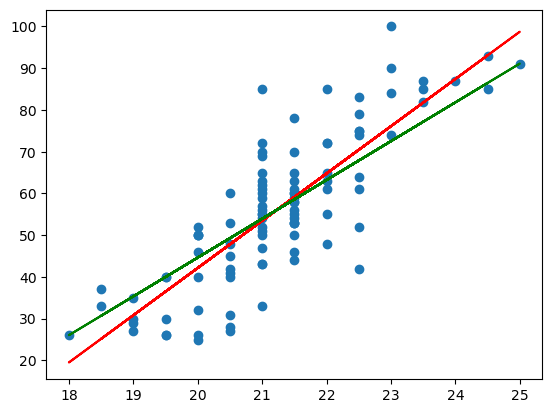

In [579]:
coefficients = cool_regression(x, y)
coefficients_not_cool = not_so_cool_regression_linear(x, y)
y_estimate = cool_function(x, coefficients)
y_estimate_not_cool = cool_function(x, coefficients_not_cool)
plt.plot(x, y_estimate, color='red')
plt.plot(x, y_estimate_not_cool, color='green')
plt.scatter(x, y)

In [580]:
np.sum(np.abs(y_estimate_not_cool - y_estimate)) / n

2.0113775730629935

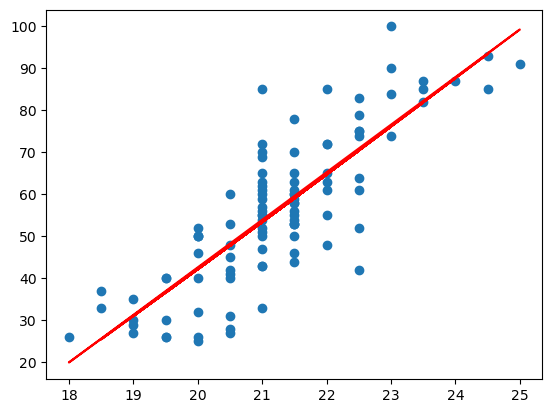

In [581]:
coefficients = cool_regression(x, y, scale=3)
y_estimate_2 = cool_function(x, coefficients)
plt.plot(x, y_estimate_2, color='red')
plt.scatter(x, y)

Среднеквадратическое отклонение между двумя полученными функциями

In [582]:
error = np.sqrt(np.sum(np.power(y_estimate - y_estimate_2, 2))) / n
error

0.01259844178187991

In [583]:
np.round(error, 5) == 0

False

Среднеквадратическое отклонение между реальными данными и полученной функцией

In [588]:
error = np.sqrt(np.sum(np.power(y - y_estimate, 2))) / n
error

1.030035101329263